In [25]:
import cv2
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt

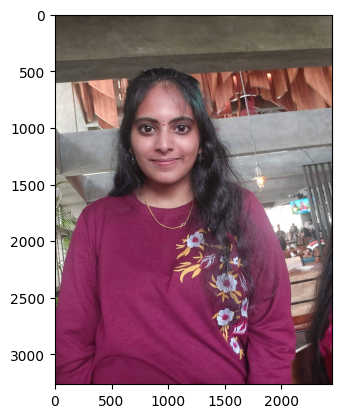

In [26]:

# Import an image
img = cv2.imread("./janani.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Let's do the conversion in imshow
plt.imshow(img)

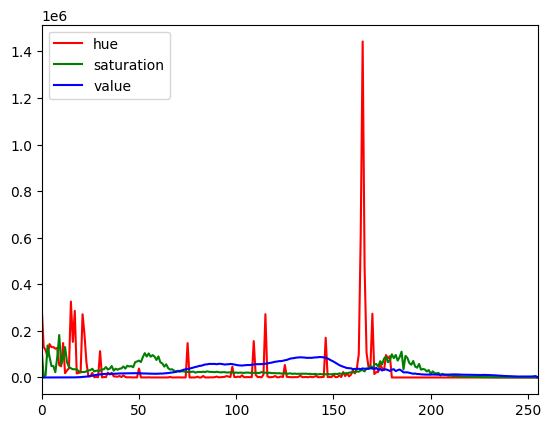

In [27]:
# Convert to HSV
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Create a histogram of HSV values.

# Hue
hist = cv2.calcHist([img],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()

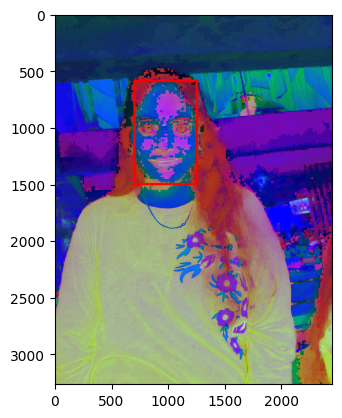

In [28]:
# Rectangle OpenCv function
# cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)

# Top left corner of rectangle
top_left = (700,590)

# Bottom right corner of rectangle
bottom_right = (1250,1500)

# Color
rect_color = (255,0,0)

# Thickness
thickness = 20

# Rectangle function
img_rect = cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)

# Plot image
plt.imshow(img_rect)

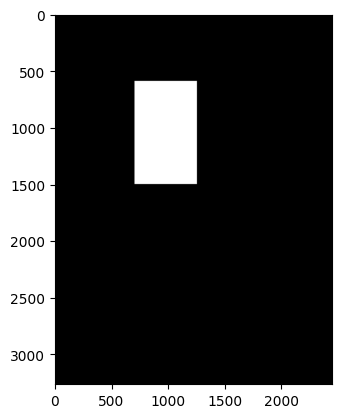

In [29]:
# Create an black mask.
mask = np.zeros(img.shape[:2], np.uint8)

# Add the white portion of the mask.
mask[590:1500, 700:1250] = 255

# Plot mask.
plt.imshow(mask, cmap="gray")

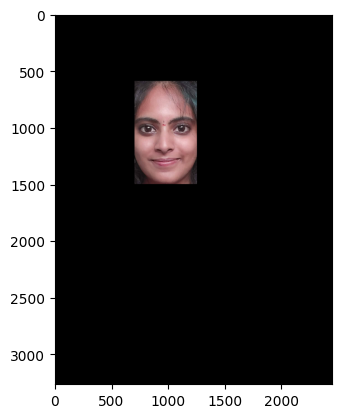

In [30]:

# Import the face image again.
img = cv2.imread("./janani.jpg")

# Convert our image to RGB so we can plot it.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_masked = cv2.bitwise_and(img, img, mask=mask)

# Plot the masked image.
plt.imshow(img_masked)


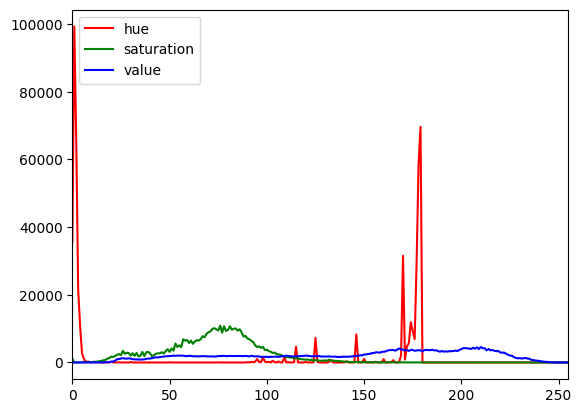

In [31]:
# Create a histogram of HSV values.
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)


# Hue
hist = cv2.calcHist([img],[0],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img],[1],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img],[2],mask,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()

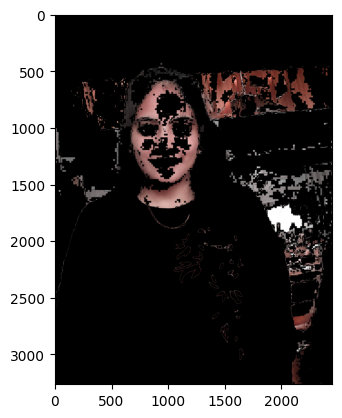

In [32]:
# Minimum and maximum HSV values.
min_HSV = np.array([0,0,0], np.uint8)
max_HSV = np.array([5,255,255], np.uint8)

# cv2.inRange(image, minimum, maximum)
skinArea = cv2.inRange(img, min_HSV, max_HSV)

# Bitwise And mask
skinHSV = cv2.bitwise_and(img, img, mask=skinArea)

# Convert to RGB
skinHSV = cv2.cvtColor(skinHSV, cv2.COLOR_HSV2RGB)

# Plot masked image.
plt.imshow(skinHSV)